In [18]:

import pandas as pd

# 1. Load the CSV data
print("--------------------------------------------------------------------------")
print("Reading the original vaccination-data.csv file")
df = pd.read_csv('C:/Users/JAY/Covid19_analysis/Vaccination/vaccination-data.csv')
print(df.head())
print("--------------------------------------------------------------------------")



--------------------------------------------------------------------------
Reading the original vaccination-data.csv file
   Unnamed: 0      COUNTRY ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  \
0           0        Aruba  ABW       AMRO   REPORTING   2023-12-29   
1           1  Afghanistan  AFG       EMRO   REPORTING   2023-12-31   
2           2       Angola  AGO       AFRO   REPORTING   2023-12-31   
3           3     Anguilla  AIA       AMRO   REPORTING   2023-12-29   
4           4      Albania  ALB       EURO   REPORTING   2023-12-23   

   TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
0            217124.0                        90493.0   
1          22964750.0                     19151369.0   
2          27819132.0                     16550642.0   
3             24864.0                        10858.0   
4           3088966.0                      1349255.0   

   TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
0                      203.0                

In [19]:
# 2. Replace NULL/NaN with 0 for numerical columns
print("Replacing NULL/NaN with 0")
df.fillna(0, inplace=True)
print(df.head())
print("--------------------------------------------------------------------------")



Replacing NULL/NaN with 0
   Unnamed: 0      COUNTRY ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  \
0           0        Aruba  ABW       AMRO   REPORTING   2023-12-29   
1           1  Afghanistan  AFG       EMRO   REPORTING   2023-12-31   
2           2       Angola  AGO       AFRO   REPORTING   2023-12-31   
3           3     Anguilla  AIA       AMRO   REPORTING   2023-12-29   
4           4      Albania  ALB       EURO   REPORTING   2023-12-23   

   TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
0            217124.0                        90493.0   
1          22964750.0                     19151369.0   
2          27819132.0                     16550642.0   
3             24864.0                        10858.0   
4           3088966.0                      1349255.0   

   TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
0                      203.0                                  85.0   
1                       59.0                                  49.0   


In [20]:
# 3. Fix empty string date fields before conversion
print("Handling DATE_UPDATED and FIRST_VACCINE_DATE fields")
df['DATE_UPDATED'] = df['DATE_UPDATED'].replace('', pd.NA)
df['FIRST_VACCINE_DATE'] = df['FIRST_VACCINE_DATE'].replace('', pd.NA)



Handling DATE_UPDATED and FIRST_VACCINE_DATE fields


In [21]:
# 4. Convert to datetime and fill invalids with default date
df['DATE_UPDATED'] = pd.to_datetime(df['DATE_UPDATED'], errors='coerce')
df['DATE_UPDATED'] = df['DATE_UPDATED'].fillna(pd.to_datetime('2022-01-01'))

df['FIRST_VACCINE_DATE'] = pd.to_datetime(df['FIRST_VACCINE_DATE'], errors='coerce')
df['FIRST_VACCINE_DATE'] = df['FIRST_VACCINE_DATE'].fillna(pd.to_datetime('2022-01-01'))

print("Updated DATE_UPDATED and FIRST_VACCINE_DATE with default where necessary")
print("--------------------------------------------------------------------------")



Updated DATE_UPDATED and FIRST_VACCINE_DATE with default where necessary
--------------------------------------------------------------------------


In [22]:
# 5. Save the modified DataFrame
print("Saving the modified DataFrame to CSV file")
df.to_csv('C:/Users/JAY/Covid19_analysis/Vaccination/vaccination-data.csv', index=False)
print("Saved successfully!")
print("--------------------------------------------------------------------------")



Saving the modified DataFrame to CSV file
Saved successfully!
--------------------------------------------------------------------------


In [23]:
# 6. Re-read and confirm update
print("Re-reading the updated CSV file for verification")
df_updated = pd.read_csv('C:/Users/JAY/Covid19_analysis/Vaccination/vaccination-data.csv')
print(df_updated.head())
print("--------------------------------------------------------------------------")


Re-reading the updated CSV file for verification
   Unnamed: 0      COUNTRY ISO3 WHO_REGION DATA_SOURCE DATE_UPDATED  \
0           0        Aruba  ABW       AMRO   REPORTING   2023-12-29   
1           1  Afghanistan  AFG       EMRO   REPORTING   2023-12-31   
2           2       Angola  AGO       AFRO   REPORTING   2023-12-31   
3           3     Anguilla  AIA       AMRO   REPORTING   2023-12-29   
4           4      Albania  ALB       EURO   REPORTING   2023-12-23   

   TOTAL_VACCINATIONS  PERSONS_VACCINATED_1PLUS_DOSE  \
0            217124.0                        90493.0   
1          22964750.0                     19151369.0   
2          27819132.0                     16550642.0   
3             24864.0                        10858.0   
4           3088966.0                      1349255.0   

   TOTAL_VACCINATIONS_PER100  PERSONS_VACCINATED_1PLUS_DOSE_PER100  \
0                      203.0                                  85.0   
1                       59.0                   

------------------------ Visualization of data 1----------------------------


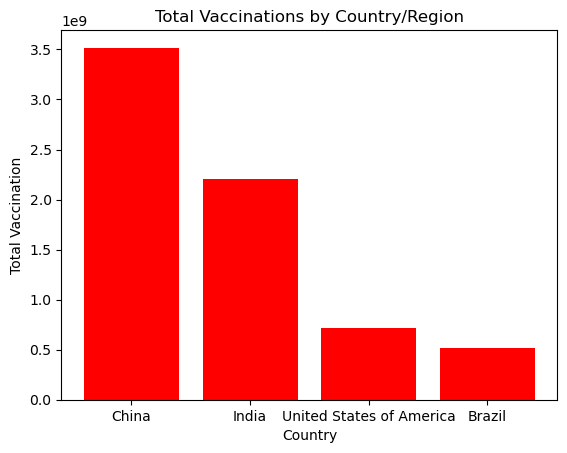

In [40]:
print("------------------------ Visualization of data 1----------------------------")
import matplotlib.pyplot as plt

#Group
top = df.groupby('COUNTRY')['TOTAL_VACCINATIONS'].sum().sort_values(ascending = False).head(4)
country = top.index
total = top.values

#Plot
plt.bar(country,total,color = "Red")
plt.xlabel("Country")
plt.ylabel("Total Vaccination")
plt.title("Total Vaccinations by Country/Region")
plt.show()

------------------------ Visualization of data 2 ----------------------------


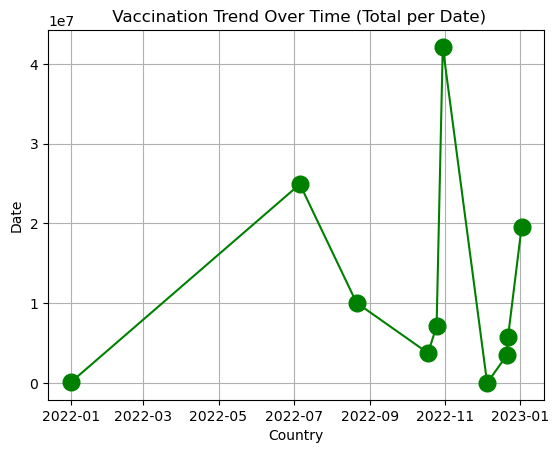

In [48]:
print("------------------------ Visualization of data 2 ----------------------------")
#Group
time = df.groupby('DATE_UPDATED')['TOTAL_VACCINATIONS'].sum().head(10)
country = time.index
date = time.values

plt.plot(country,date,marker= 'o', color = 'Green', markersize = 12)
plt.xlabel("Country")
plt.ylabel("Date")
plt.title(" Vaccination Trend Over Time (Total per Date)")
plt.grid(True)
plt.show()

------------------------ Visualization of data 3 ----------------------------


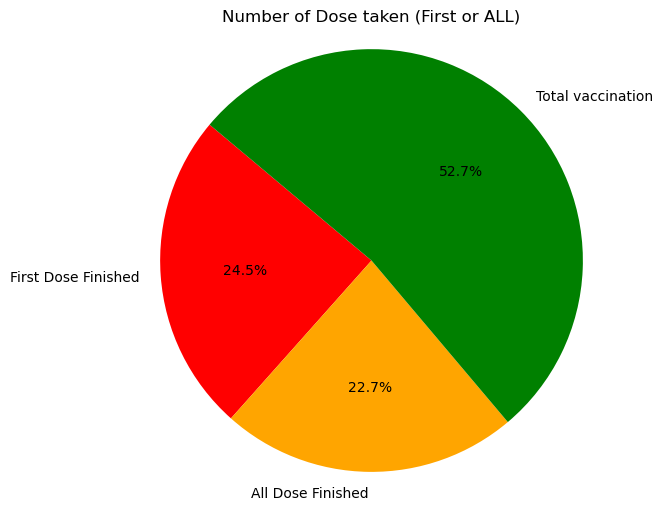

In [55]:
print("------------------------ Visualization of data 3 ----------------------------")
country = "India"
country_data = df[df['COUNTRY'] == country].iloc[0]

labels = ["First Dose Finished","All Dose Finished","Total vaccination"]
size = [country_data['PERSONS_VACCINATED_1PLUS_DOSE'],country_data['PERSONS_LAST_DOSE'],country_data['TOTAL_VACCINATIONS']]
plt.figure(figsize=(6,6))
plt.pie(size,autopct = '%1.1f%%',startangle = 140, colors = ['red','orange','green'], labels = labels)
plt.title("Number of Dose taken (First or ALL)")
plt.axis('equal')
plt.show()